In [1]:
from sklearn.metrics import classification_report,auc,roc_auc_score
from PIL import Image
import time
from pathlib import Path


import os
import numpy as np
import pandas as pd
from PIL import Image


import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from glob import glob
#from skimage import io
from sklearn.utils import shuffle

#from nipype.interfaces.ants import N4BiasFieldCorrection
import sys
import os
import ast

import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_csv('df_spy2_full_data_with_pred_v15.csv')

In [36]:
df_nop=df[['pid', 'pCR', 'n_xy', 'n_z', 'n_times', 'pre', 'post_early',
       'post_late', 'slice_thick', 'xy_spacing', 'mask_start', 'mask_end',
       'mask_count', 'mask_max', #'sraw', 'eraw', 'scol', 'ecol', 
           'age', 'menopause', 
       'race_white', 'race_black',
           'HR', 'HER2', 'HR_HER2_STATUS', 'TripleNeg',
       'HER2pos', 'HRposHER2neg',
           'MP',
           'Ganitumab', 'Pembrolizumab',
       'AMG 386', 'Ganetespib', 'Carboplatin', 'MK-2206', 'T-DM1', 'Neratinib',
       'ABT 888', 'Trastuzumab', 'Paclitaxel', 'Pertuzumab',
           
        #'hormon_status', 
          'test']]


In [37]:
base_path='.'

In [38]:
df_a = pd.read_csv(os.path.join(base_path, 'df_all_statistics_pred_pcr.csv'))

In [39]:
cc=[c for c in ['pCR', 'n_xy', 'n_z', 'n_times', 'pre', 'post_early',
       'post_late', 'slice_thick', 'xy_spacing', 'mask_start', 'mask_end',
       'mask_count', 'mask_max',
                #'sraw', 'eraw', 'scol', 'ecol', 
           'age',
       'race_white', 'race_black',
           'HR', 'HER2', 'HR_HER2_STATUS', 'TripleNeg',
       'HER2pos', 'HRposHER2neg',
           'MP',
           'Ganitumab', 'Pembrolizumab',
       'AMG 386', 'Ganetespib', 'Carboplatin', 'MK-2206', 'T-DM1', 'Neratinib',
       'ABT 888', 'Trastuzumab', 'Paclitaxel', 'Pertuzumab',
           'test'] if c in df_a.columns]
cc

['pCR',
 'n_xy',
 'n_z',
 'n_times',
 'mask_start',
 'mask_end',
 'mask_count',
 'mask_max',
 'age',
 'race_white',
 'race_black',
 'HR',
 'HER2',
 'HR_HER2_STATUS',
 'TripleNeg',
 'HER2pos',
 'HRposHER2neg',
 'test']

In [24]:
for i,row in df.iterrows():
    p=row['pid']
    tt=df_a[df_a.pid==p]
    for c in cc:
        if row[c]!=tt[c].values[0]:
            print('ppppp',c)
            break
    

In [40]:
df_nop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pid             982 non-null    object 
 1   pCR             982 non-null    float64
 2   n_xy            982 non-null    float64
 3   n_z             982 non-null    float64
 4   n_times         982 non-null    float64
 5   pre             982 non-null    float64
 6   post_early      982 non-null    float64
 7   post_late       982 non-null    float64
 8   slice_thick     982 non-null    float64
 9   xy_spacing      980 non-null    float64
 10  mask_start      982 non-null    float64
 11  mask_end        982 non-null    float64
 12  mask_count      982 non-null    float64
 13  mask_max        982 non-null    float64
 14  age             982 non-null    float64
 15  menopause       944 non-null    float64
 16  race_white      982 non-null    float64
 17  race_black      982 non-null    flo

In [41]:
df_nop.to_csv('breasrdcedl_ispy2_metadata.csv', index = False)

In [43]:
df_nop.to_csv('./FINAL/breasrdcedl_ispy2_metadata.csv', index = False)

In [44]:
df_nop.test.value_counts()

test
0.0    784
1.0     99
2.0     99
Name: count, dtype: int64

In [45]:
pd.crosstab(df_nop.test,df_nop.pCR)

pCR   0.0  1.0
test          
0.0   532  252
1.0    67   32
2.0    67   32

In [46]:
pd.crosstab(df_nop.test,df_nop.HR)

HR    0.0  1.0
test          
0.0   351  433
1.0    45   54
2.0    50   49

<Axes: title={'center': 'Tumor Bounding Box Volume'}, ylabel='Frequency'>

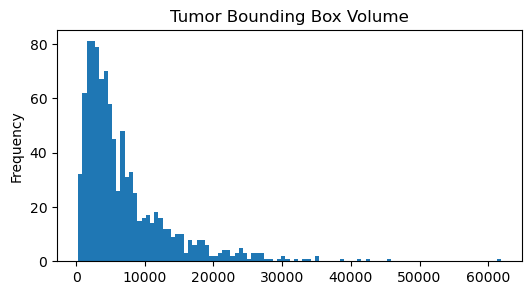

In [11]:
df_nop.bbox_vol.plot(kind='hist',figsize=(6,3),bins=100,title='Tumor Bounding Box Volume')

<Axes: title={'center': 'Tumor Bounding Box Volume'}, ylabel='Frequency'>

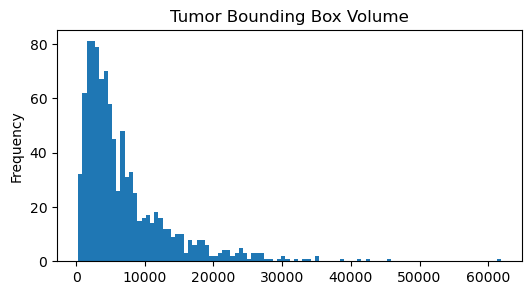

In [11]:
df_nop.bbox_vol.plot(kind='hist',figsize=(6,3),bins=100,title='Tumor Bounding Box Volume')

<Axes: title={'center': 'Tumor  Volume'}, ylabel='Frequency'>

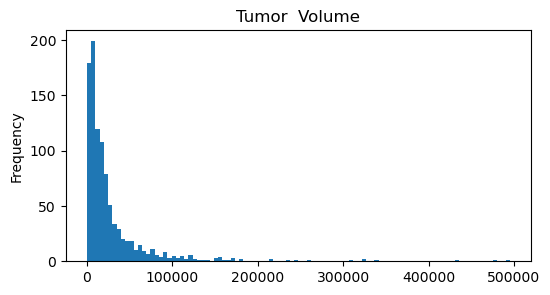

In [12]:
df_nop.tum_vol.plot(kind='hist',figsize=(6,3),bins=100,title='Tumor  Volume')

In [14]:
for c in ['hormon_status', 'menopause']:
    print(df[c].value_counts())

hormon_status
luminal_hrpos_her2neg    345
triple_neg               326
hrneg_her2pos            167
hrpos_her2pos            144
Name: count, dtype: int64
menopause
0.0    562
1.0    382
Name: count, dtype: int64


In [47]:
import sys
import importlib

# Delete existing import if it exists
if 'dce_utils' in sys.modules:
    del sys.modules['dce_utils']

import dce_utils as ds
importlib.reload(ds)


<module 'dce_utils' from 'C:\\Users\\naomi\\Downloads\\breast_mri\\dce_utils.py'>

In [48]:
ds.setup_paths('.')

False True . spy2
{'spy2': 'G:\\My Drive\\breast_mri\\SPY2\\vis1\\dce_cropped\\', 'spy1': 'G:\\My Drive\\breast_mri\\SPY1\\vis1\\dce\\', 'duke': 'G:\\My Drive\\breast_mri\\DUKE\\dce\\'} {'spy2': 'G:\\My Drive\\breast_mri\\SPY2\\vis1\\mask\\', 'spy1': 'G:\\My Drive\\breast_mri\\SPY1\\vis1\\mask\\', 'duke': 'G:\\My Drive\\breast_mri\\DUKE\\vis1\\mask\\'}


In [49]:
d=ds.get_ser_acquisitions('ISPY2-388581', 'spy2',[0,2,4])

<Figure size 640x480 with 0 Axes>

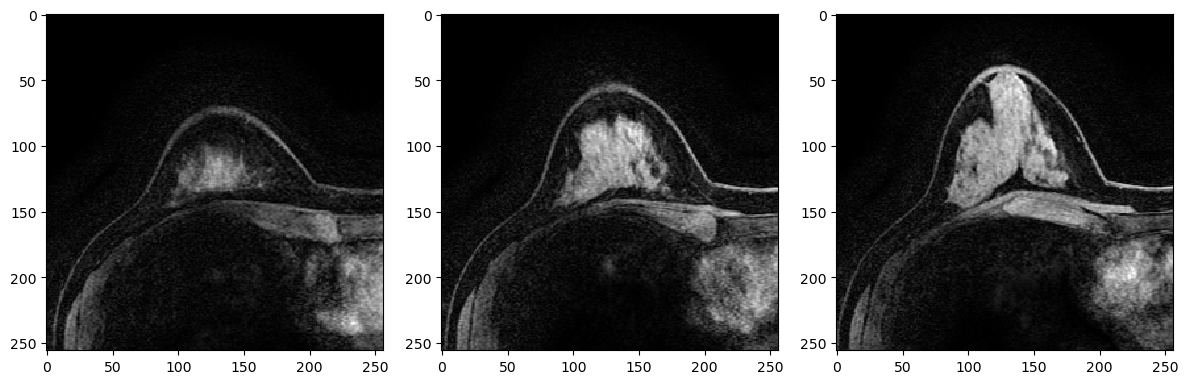

In [50]:
ds.show_n_images([d[0][k] for k in [20,30,40]])

ISPY2-388581 spy2
82 105 (116, 256, 256)


<Figure size 640x480 with 0 Axes>

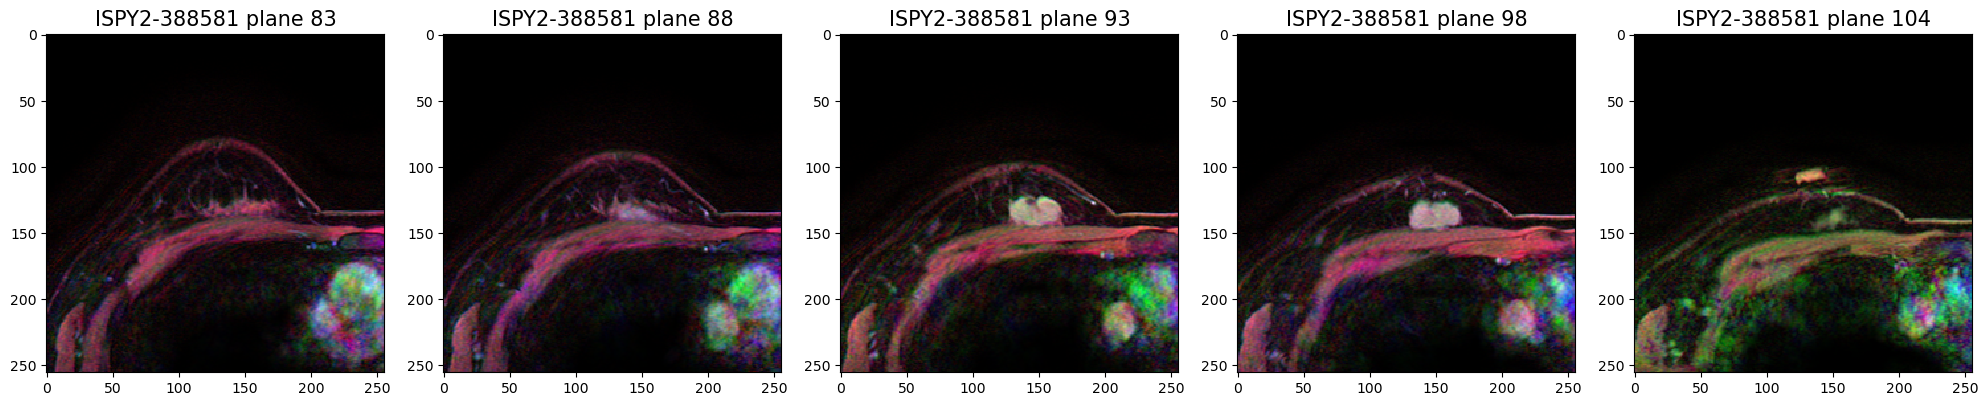

<Figure size 640x480 with 0 Axes>

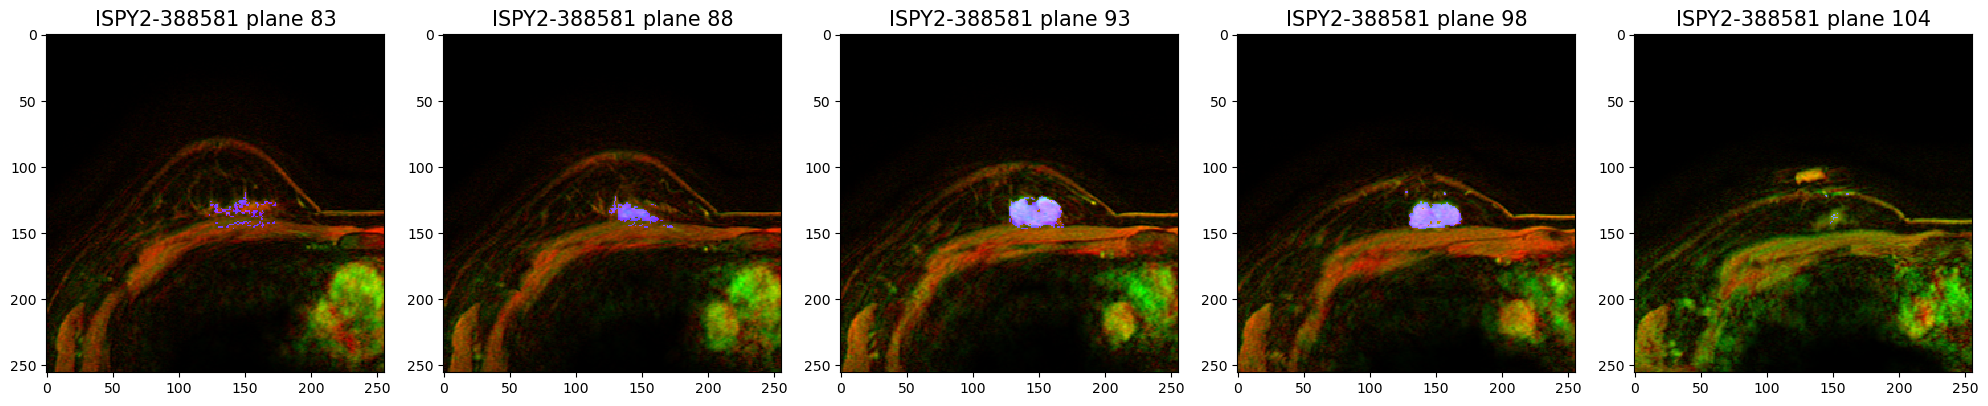

In [51]:
ds.show_pid('ISPY2-388581', 'spy2')

In [80]:
df=df_nop
df.tail()

pid  pCR   n_xy    n_z  n_times  pre  post_early  post_late  \
977  ISPY2-990443  0.0  256.0  124.0      7.0  0.0         2.0        5.0   
978  ISPY2-994987  0.0  256.0   72.0      7.0  0.0         2.0        6.0   
979  ISPY2-997702  1.0  256.0  134.0      6.0  0.0         2.0        5.0   
980  ISPY2-999264  1.0  256.0   66.0      7.0  0.0         2.0        6.0   
981  ISPY2-999733  0.0  256.0   66.0      7.0  0.0         2.0        6.0   

     slice_thick  xy_spacing  ...  Ganetespib  Carboplatin  MK-2206  T-DM1  \
977          1.3    0.585938  ...         0.0          0.0      0.0    0.0   
978          2.2    0.703100  ...         0.0          1.0      0.0    0.0   
979          1.2    0.664100  ...         0.0          1.0      0.0    0.0   
980          2.4    0.625000  ...         0.0          0.0      0.0    0.0   
981          2.4    0.566400  ...         0.0          0.0      1.0    0.0   

     Neratinib  ABT 888  Trastuzumab  Paclitaxel  Pertuzumab  test  
977        0.0      0.0          0.0         1.0         0.0   0.0  
978        0.0      1.0          0.0         1.0         0.0   0.0  
979        0.0      1.0          0.0         1.0         0.0   1.0  
980        0.0      0.0          1.0         1.0         1.0   0.0  
981        0.0      0.0          0.0         1.0         0.0   0.0  

[5 rows x 38 columns]

In [67]:
df[df.n_xy>256].head(1).T

22
pid             ACRIN-6698-172366
pCR                           1.0
n_xy                        320.0
n_z                          64.0
n_times                       7.0
pre                           0.0
post_early                    2.0
post_late                     5.0
slice_thick                   2.5
xy_spacing                  0.625
mask_start                   13.0
mask_end                     39.0
mask_count                32838.0
mask_max                     23.0
age                          51.0
menopause                     0.0
race_white                    1.0
race_black                    0.0
HR                            0.0
HER2                          0.0
HR_HER2_STATUS          TripleNeg
TripleNeg                     1.0
HER2pos                       0.0
HRposHER2neg                  0.0
MP                            1.0
Ganitumab                     1.0
Pembrolizumab                 0.0
AMG 386                       0.0
Ganetespib                    0.0
Carboplatin                   0.0
MK-2206                       0.0
T-DM1                         0.0
Neratinib                     0.0
ABT 888                       0.0
Trastuzumab                   0.0
Paclitaxel                    1.0
Pertuzumab                    0.0
test                          0.0

In [65]:
d=ds.get_ser_acquisitions('ACRIN-6698-172366', 'spy2',[0,2,5])

In [70]:
m=ds.get_nifti_mask('ACRIN-6698-172366', 'spy2')
m.shape

(64, 320, 320)

In [77]:
ds.nifti_path

{'spy2': 'G:\\My Drive\\breast_mri\\SPY2\\vis1\\dce_cropped\\',
 'spy1': 'G:\\My Drive\\breast_mri\\SPY1\\vis1\\dce\\',
 'duke': 'G:\\My Drive\\breast_mri\\DUKE\\dce\\'}

In [81]:
p='ISPY2-997702'#'ACRIN-6698-172366'
[ c for c in os.listdir(ds.nifti_path['spy2']) if p in c]

['ISPY2-997702_spy2_vis1_dce_aqc_0.nii.gz',
 'ISPY2-997702_spy2_vis1_dce_aqc_1.nii.gz',
 'ISPY2-997702_spy2_vis1_dce_aqc_2.nii.gz',
 'ISPY2-997702_spy2_vis1_dce_aqc_3.nii.gz',
 'ISPY2-997702_spy2_vis1_dce_aqc_4.nii.gz',
 'ISPY2-997702_spy2_vis1_dce_aqc_5.nii.gz']

In [82]:
ds.mask_path

{'spy2': 'G:\\My Drive\\breast_mri\\SPY2\\vis1\\mask\\',
 'spy1': 'G:\\My Drive\\breast_mri\\SPY1\\vis1\\mask\\',
 'duke': 'G:\\My Drive\\breast_mri\\DUKE\\vis1\\mask\\'}

In [83]:
[ c for c in os.listdir(ds.mask_path['spy2']) if p in c]

['ISPY2-997702_spy2_vis1_mask.nii.gz']

In [ ]:
ISPY2-997702_spy2_aqc_0.nii.gz
ISPY2-997702_spy2_aqc_1.nii.gz
ISPY2-997702_spy2_aqc_2.nii.gz
ISPY2-997702_spy2_aqc_3.nii.gz
ISPY2-997702_spy2_aqc_4.nii.gz
ISPY2-997702_spy2_aqc_5.nii.gz
ISPY2-997702_spy2_aqc_5.nii.gz
ISPY2-997702_spy2_aqc_5.nii.gz

<Figure size 640x480 with 0 Axes>

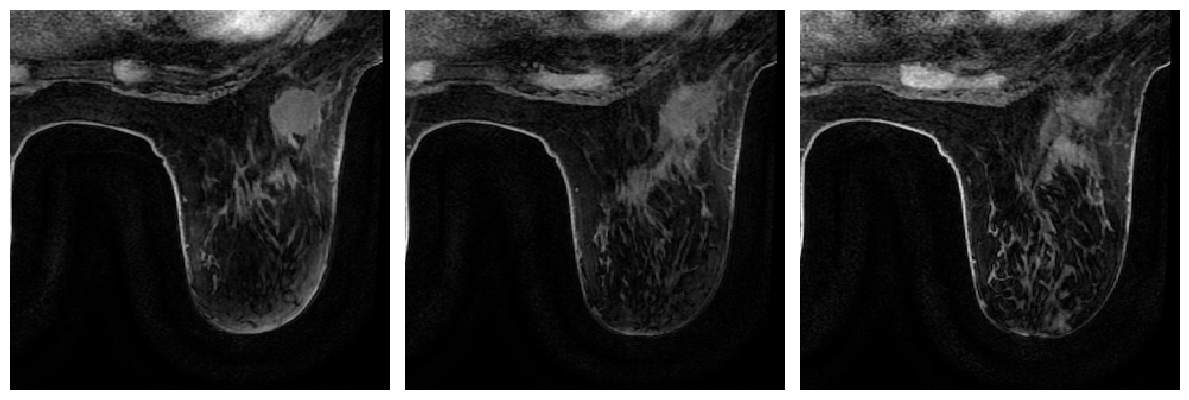

<Figure size 640x480 with 0 Axes>

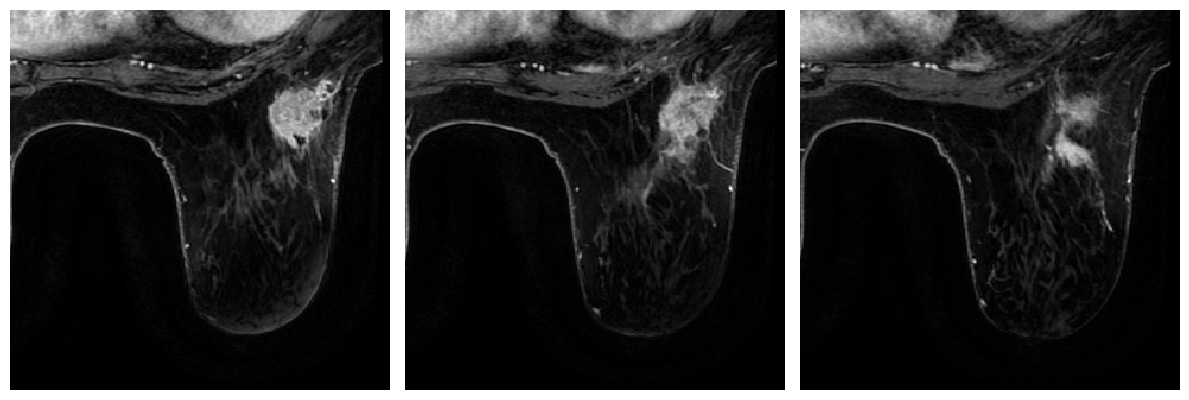

<Figure size 640x480 with 0 Axes>

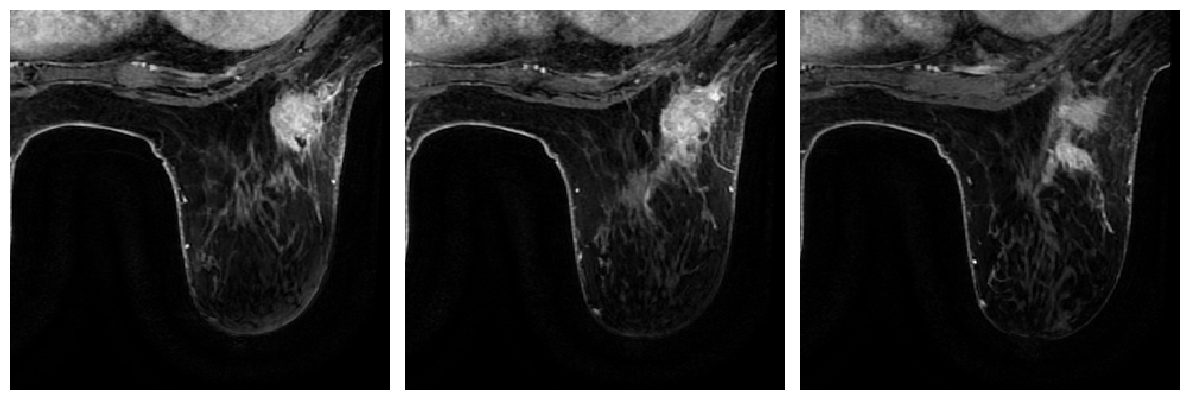

<Figure size 640x480 with 0 Axes>

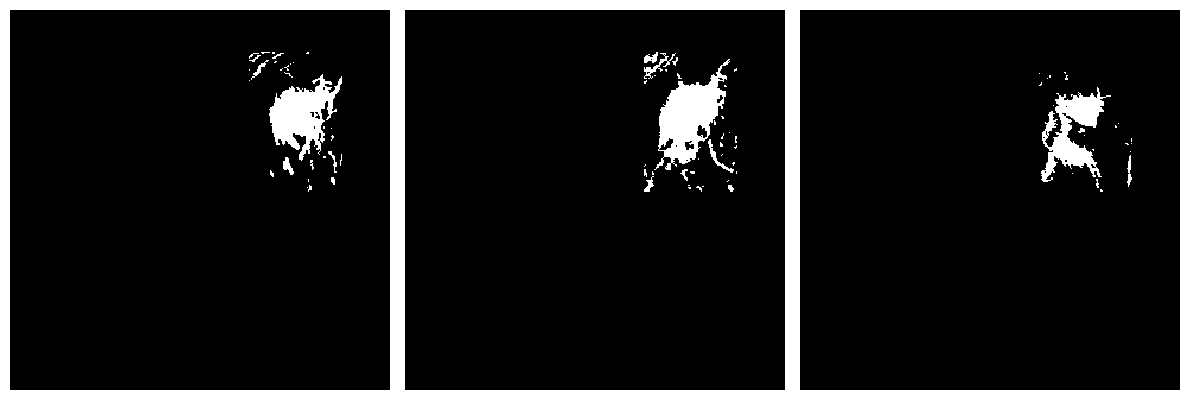

In [76]:
ds.show_n_images([d[0][k] for k in [20,23,26]],axis_off=True)
ds.show_n_images([d[1][k] for k in [20,23,26]],axis_off=True)
ds.show_n_images([d[2][k] for k in [20,23,26]],axis_off=True)
ds.show_n_images([m[k] for k in [20,23,26]],axis_off=True)

<Figure size 640x480 with 0 Axes>

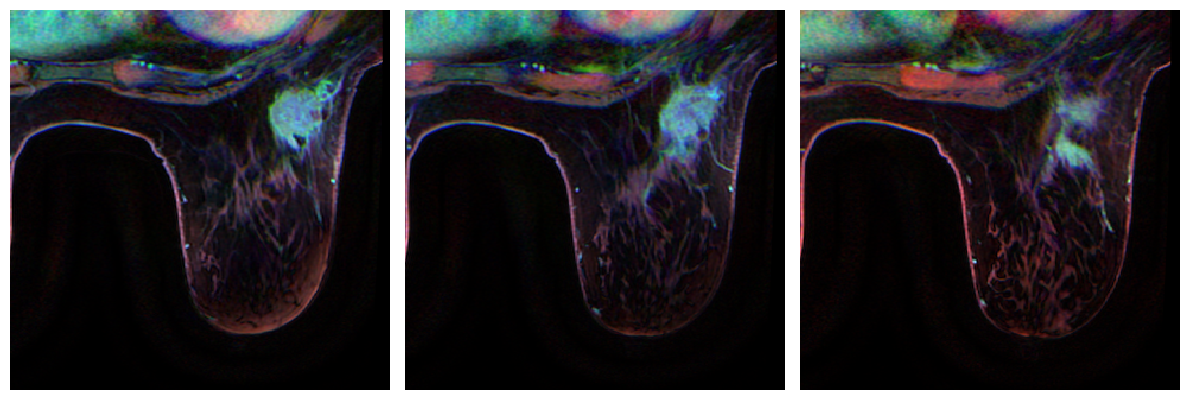

<Figure size 640x480 with 0 Axes>

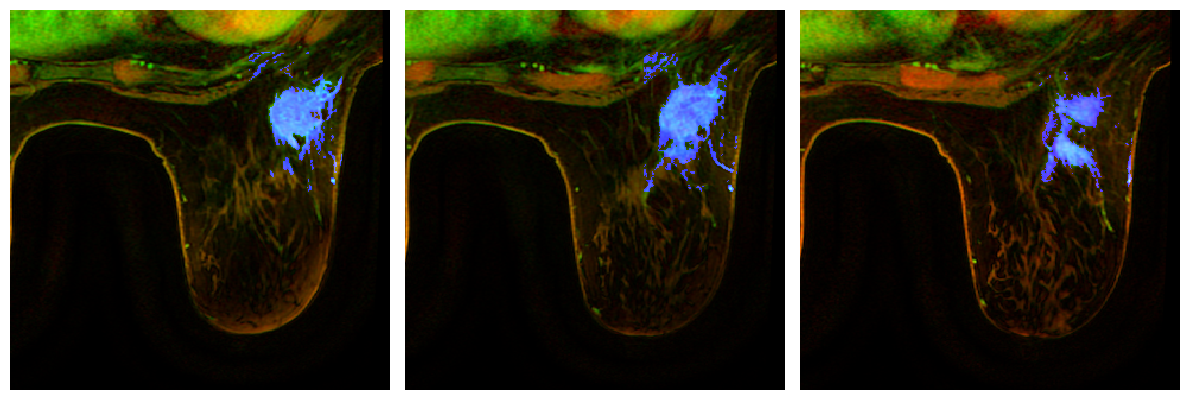

In [75]:
ds.show_n_images([ds.to_rgb(d[0][k],
                            d[1][k],d[2][k]) for k in [20,23,26]],axis_off=True)
ds.show_n_images([ds.to_rgb(d[0][k],
                            d[1][k],m[k]) for k in [20,23,26]],axis_off=True)

<Figure size 640x480 with 0 Axes>

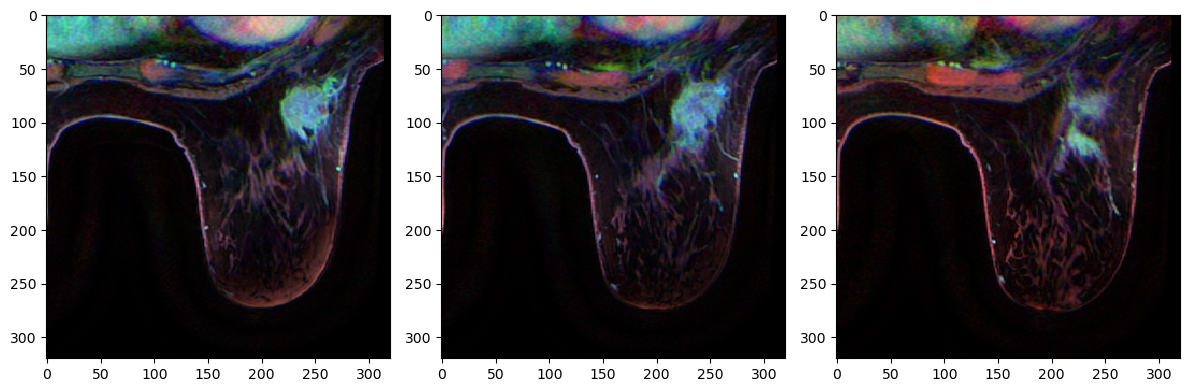

In [69]:
ds.show_n_images([ds.to_rgb(d[0][k],
                            d[1][k],d[2][k]) for k in [20,23,26]])

ACRIN-6698-172366 spy2
13 39 (64, 320, 320)


<Figure size 640x480 with 0 Axes>

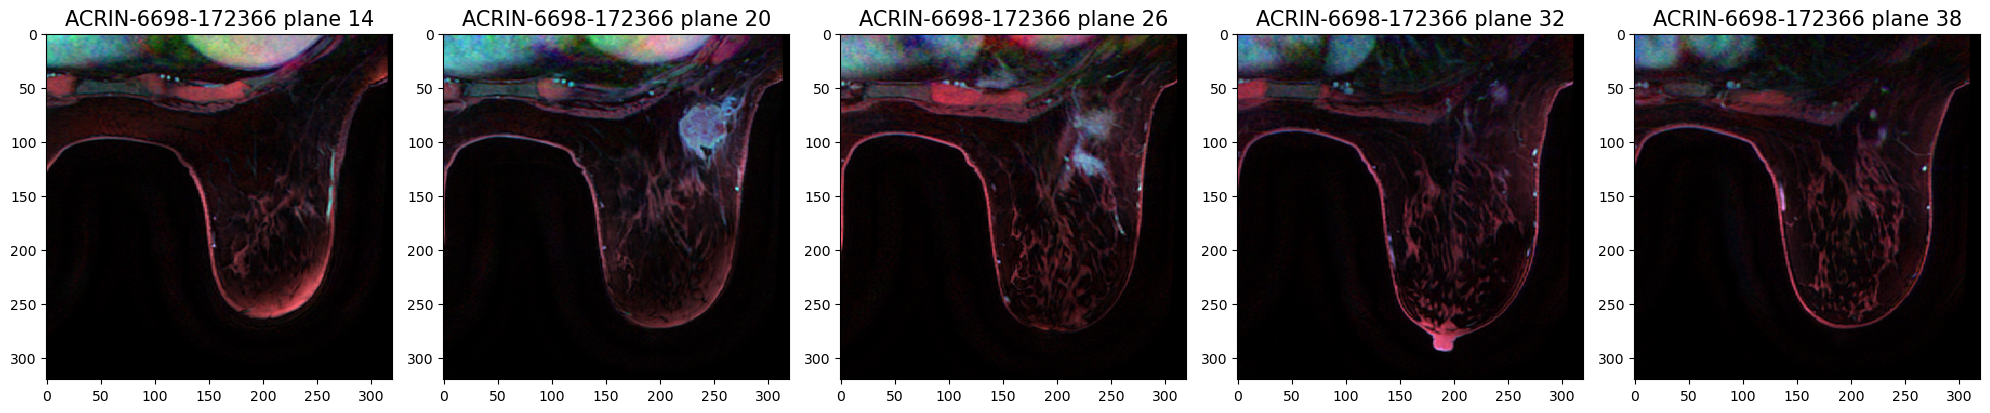

<Figure size 640x480 with 0 Axes>

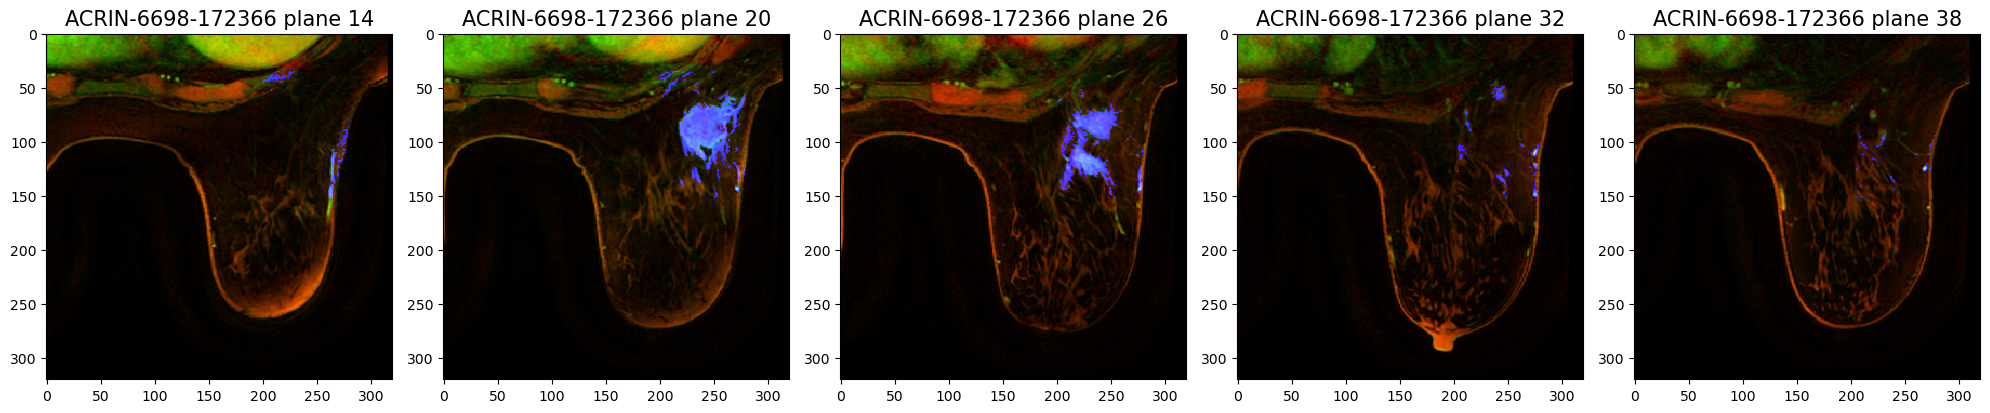

In [54]:
ds.show_pid('ACRIN-6698-172366', 'spy2')